<a href="https://colab.research.google.com/github/aneeshghisad/BTech-Project/blob/main/Proj_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving milk_data_changed.csv to milk_data_changed.csv


In [3]:
milk = pd.read_csv('milk_data_changed.csv')

In [4]:
print(milk.shape)

(1059, 6)


In [5]:
milk.head(5)

,pH,Temprature,Odor,Turbidity,Colour,Grade
0,6.6,35,0,0,254,high
1,6.6,36,1,1,253,high
2,8.5,70,1,1,246,low
3,9.5,34,1,1,255,low
4,6.6,37,0,0,255,medium


In [6]:
#Check for missing data
NAs = pd.concat([milk.isnull().sum()], axis=1, keys=["Milk"])
NAs[NAs.sum(axis=1) > 0]

,Milk


In [7]:
print(milk.dtypes)

pH            float64
Temprature      int64
Odor            int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object


In [8]:
labels = milk.pop('Grade')

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(milk, labels, test_size=0.25,random_state=14)

In [42]:
milk

,pH,Temprature,Odor,Turbidity,Colour
0,6.6,35,0,0,254
1,6.6,36,1,1,253
2,8.5,70,1,1,246
3,9.5,34,1,1,255
4,6.6,37,0,0,255
...,...,...,...,...,...
1054,6.7,45,1,0,247
1055,6.7,38,0,0,255
1056,3.0,40,1,1,255
1057,6.8,43,0,0,250


In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [44]:
y_pred = rf.predict(x_test)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 59   0   2]
 [  1 101   0]
 [  1   0 101]]

Classification Report:
              precision    recall  f1-score   support

        high       0.97      0.97      0.97        61
         low       1.00      0.99      1.00       102
      medium       0.98      0.99      0.99       102

    accuracy                           0.98       265
   macro avg       0.98      0.98      0.98       265
weighted avg       0.98      0.98      0.98       265



In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate individual metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Accuracy: 0.9849056603773585
Precision: 0.982598546341981
Recall: 0.9825350905389478
F1-score: 0.9825509533460836


In [47]:
# Test sample
sample = {
    'pH': 6.8,
    'Temprature': 45,
    'Odor': 1,
    'Turbidity': 0,
    'Colour': 254,
}

sample_df = pd.DataFrame([sample])

predicted_grade = rf.predict(sample_df)
print("Predicted Milk Grade:", predicted_grade[0])


Predicted Milk Grade: high


In [48]:
# Getting Feature Importances
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': milk.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

      Feature  Importance
0          pH    0.458456
1  Temprature    0.247263
2        Odor    0.103198
3   Turbidity    0.098725
4      Colour    0.092360


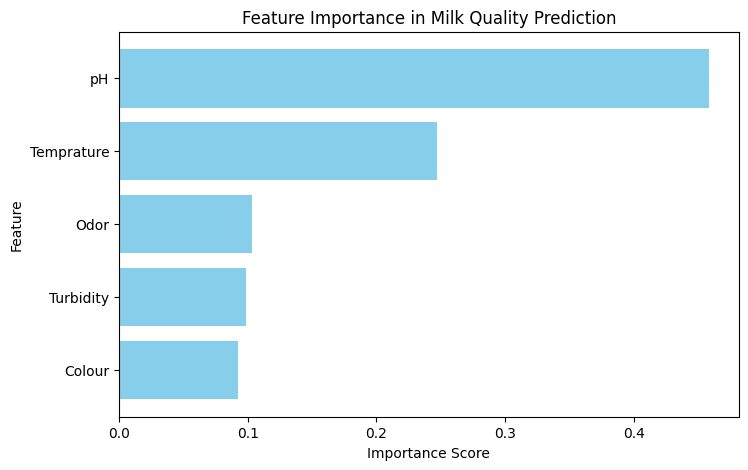

In [49]:
plt.figure(figsize=(8,5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Feature Importance in Milk Quality Prediction')
plt.gca().invert_yaxis()
plt.show()
